<a href="https://colab.research.google.com/github/big-muzzy/Autoencoders/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения



Несколько вспомогательных функций.

Функция для вывода изображений

In [2]:
def plotImages(startIndex, pred): # создадим функцию для вывода изображений как картинок
  n = 10  # количество картинок, которые хотим показать
  plt.figure(figsize=(17, 3)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = i + startIndex # startIndex - начиная с какого индекса хотим заплотить картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(28, 28)) # отрисуем обработанные сеткой картинки в размере 28*28
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()


Функция для рисования графика обучения нейросети.

In [3]:
def plotGraph(acc, valacc):
  plt.plot(acc, label='Обучающий набор')
  plt.plot(valacc, label='Проверочный набор')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Точность')
  plt.legend()
  plt.show()

Загружаем данные - MNIST. Набор рукописных цифр.

In [4]:
(xtrain_org, ytrain_org), (xtest_org, ytest_org) = mnist.load_data()
xtrain = xtrain_org.astype(float) / 255. 
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest_org.astype(float) / 255. 
xtest = xtest.reshape(10000, 28, 28, 1)

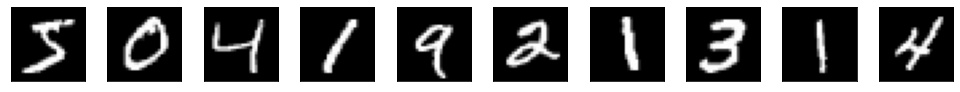

In [5]:
plotImages(0, xtrain)

Модель автокодировщика с использованием полносвязных слоев.

In [6]:
def createJustDenseModel():
  model = Sequential()
  model.add(Flatten(input_shape=xtrain.shape[1:]))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(28*28, activation='relu'))
  model.add(Reshape((28, 28, 1)))
  model.compile(optimizer='adam', loss='mse')

  return model



Создадим и обучим модель.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 784)               803600    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 2,657,040
Trainable params: 2,657,040
Non-trainable params: 0
_________________________________________________________________


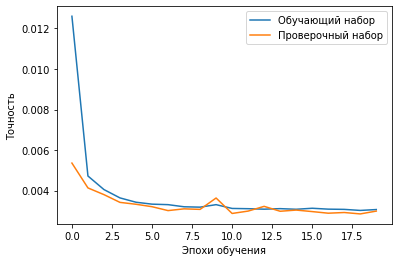

In [7]:
model = createJustDenseModel()
model.summary()
history = model.fit(xtrain, xtrain, batch_size=256, epochs=20, verbose=0, validation_data=(xtest, xtest))
plotGraph(history.history['loss'], history.history['val_loss'])

Проверим результат

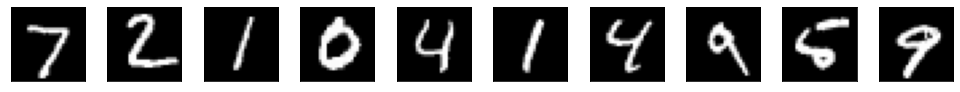

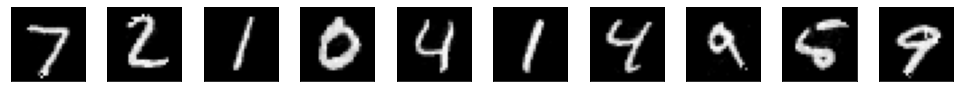

In [8]:
predict = model.predict(xtest)
plotImages(0, xtest)
plotImages(0, predict)